In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [105]:
ipl_df = pd.read_csv(r'C:\Users\ADMIN\Desktop\IPL_ball_by_ball_updated (1).csv')
ipl_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
ipl_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [107]:
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]

In [108]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)
ipl_df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [109]:
ipl_df[ipl_df.batting_team == 'Royal Challengers Bangalore'].total_runs.value_counts()

1    10900
0    9331 
4    2983 
2    1764 
6    1365 
3    91   
5    47   
7    13   
Name: total_runs, dtype: int64

In [110]:
ipl_df[ipl_df.batting_team == 'Kolkata Knight Riders'].total_runs.value_counts()

1    10756
0    9373 
4    3066 
2    1595 
6    1222 
3    87   
5    64   
7    6    
Name: total_runs, dtype: int64

In [111]:
t1 = 'Mumbai Indians'
t2 = 'Chennai Super Kings'

In [112]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()

array([ 392181,  392227,  501221,  598002,  598046,  598073,  729303,
        733995,  734045,  829729,  829817,  829823, 1136561, 1175370,
       1178419, 1181768, 1216492, 1304079], dtype=int64)

In [113]:
required_match_id = 1254084
ipl_df[ipl_df.match_id == required_match_id].head(1)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
199921,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",2,5.5,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,L Ngidi,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0


In [114]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [115]:
t1_outcomes = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [116]:
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [117]:
t1_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t1_outcomes_count.append(t1_outcomes[outcome])
        else:
            t1_outcomes_count.append(t1_outs)
    except:
        t1_outcomes_count.append(0)
        

t2_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t2_outcomes_count.append(t2_outcomes[outcome])
        else:
            t2_outcomes_count.append(t2_outs)
    except:
        t2_outcomes_count.append(0)

In [118]:
t1_outcomes_count
print("T1 team:",t1_outcomes_count)
t1_outcomes_count
print("T2 team:",t2_outcomes_count)


T1 team: [9974, 11336, 1721, 104, 3198, 1403, 1378]
T2 team: [8661, 10515, 1706, 98, 2829, 1259, 1087]


In [119]:
#PROBABILITY COUNT
t1_pb = [i/sum(t1_outcomes_count) for i in t1_outcomes_count]
print("Probability of T1:",t1_pb)

t2_pb = [i/sum(t2_outcomes_count) for i in t2_outcomes_count]
print("Probability of T2:",t2_pb)

Probability of T1: [0.3425843236930686, 0.3893659407845023, 0.05911245448924916, 0.003572164594353232, 0.10984406127636188, 0.04818987428728447, 0.047331180875180325]
Probability of T2: [0.33114127317912445, 0.4020263811890652, 0.06522653412349455, 0.0037468935194035556, 0.10816287516727204, 0.04813611164213343, 0.041559931179506786]


In [120]:
#CUM_PROBABILITY
t1_cum_pb = list(np.cumsum(t1_pb))
t2_cum_pb = list(np.cumsum(t2_pb))

In [121]:
# first innings
i1p_0 = t1_cum_pb[0]
i1p_1 = t1_cum_pb[1]
i1p_2 = t1_cum_pb[2]
i1p_3 = t1_cum_pb[3]
i1p_4 = t1_cum_pb[4]
i1p_6 = t1_cum_pb[5]
i1p_w = 1

pred_runs = 0
pred_wks = 0

for i in range(120):
    r_value = np.random.random()

    if r_value <= i1p_0:
        pred_runs += 0
    elif r_value <= i1p_1:
        pred_runs += 1
    elif r_value <= i1p_2:
        pred_runs += 2
    elif r_value <= i1p_3:
        pred_runs += 3
    elif r_value <= i1p_4:
        pred_runs += 4
    elif r_value <= i1p_6:
        pred_runs += 6
    else:
        pred_runs += 0
        pred_wks += 1
        if pred_wks == 10:
            break

# FIRST INNINGS RUN PREDICTION

In [122]:
# first innings
def innings_1_runs(curr_overs, curr_score, curr_wickets):
    i1p_0 = t1_cum_pb[0]
    i1p_1 = t1_cum_pb[1]
    i1p_2 = t1_cum_pb[2]
    i1p_3 = t1_cum_pb[3]
    i1p_4 = t1_cum_pb[4]
    i1p_6 = t1_cum_pb[5]
    i1p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number*6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break

    return pred_runs

# innings_1_runs(curr_overs, curr_score, curr_wickets)
innings_1_runs(13.4, 171, 4)


217

# SECOND INNINGS RUN PREDICTION

In [123]:
# second innings
def innings_2_runs(curr_overs, curr_score, curr_wickets, target):
    i2p_0 = t2_cum_pb[0]
    i2p_1 = t2_cum_pb[1]
    i2p_2 = t2_cum_pb[2]
    i2p_3 = t2_cum_pb[3]
    i2p_4 = t2_cum_pb[4]
    i2p_6 = t2_cum_pb[5]
    i2p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number*6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        
        if pred_runs > target:
            break

    return pred_runs

# innings_2_runs(curr_overs, curr_score, curr_wickets, target)
innings_2_runs(10.2, 122, 2, 237)

188

In [124]:
mdf = ipl_df[ipl_df.match_id == required_match_id]
mdf.reset_index(inplace = True, drop = True)



In [125]:
df_ing1 = mdf[mdf.innings == 1]
df_ing2 = mdf[mdf.innings == 2]

In [126]:
df_ing1 = df_ing1.sort_values('ball', ascending = True)
df_ing2 = df_ing2.sort_values('ball', ascending = True)

In [127]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

# RUN PREDICTION: 1st INNINGS

In [128]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_overs = df_ing1.ball[i]
    curr_wickets += df_ing1.isOut[i]
    
    prediction = innings_1_runs(curr_overs, curr_score, curr_wickets)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing1_runs_pred.append(prediction)

In [129]:
ing1_actual_score = sum(df_ing1.total_runs)

In [131]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0
target = ing1_actual_score

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_2_runs(curr_overs, curr_score, curr_wickets, target)
#     print('target: ', target)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing2_runs_pred.append(prediction)
    

ing2_actual_score = sum(df_ing2.total_runs)

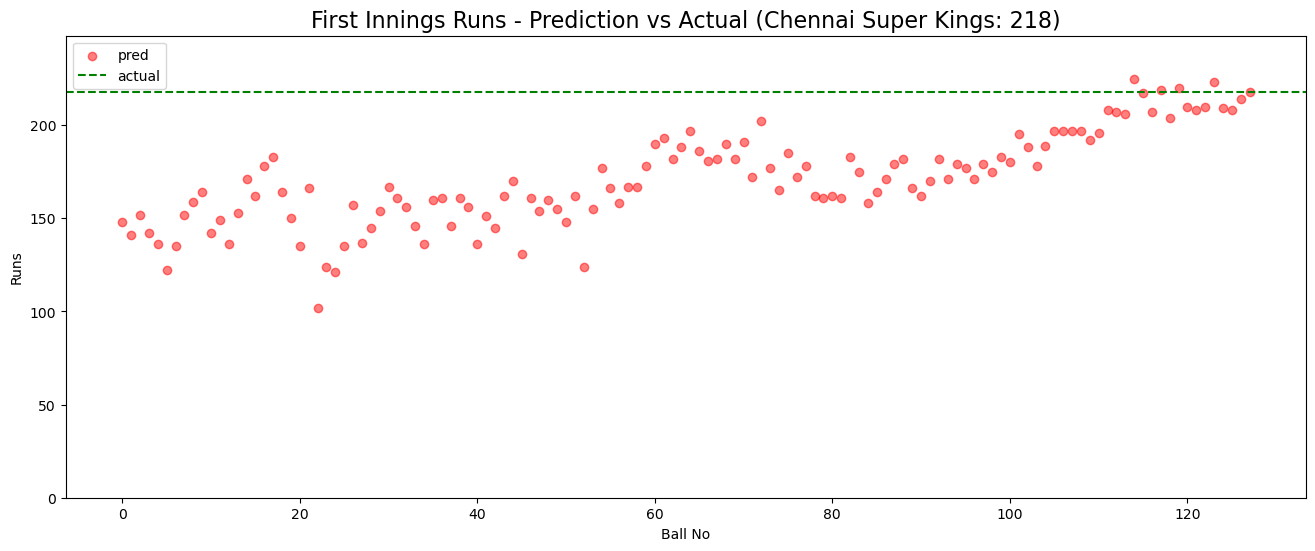

In [132]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing1_runs_pred))], ing1_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing1_actual_score + 30)
plt.axhline(ing1_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('First Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing1_actual_score) +  ')', fontsize = 16)
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()

In [133]:
#ERROR IN 1st INNINGS RUNS
np.mean([abs(i - ing1_actual_score) for i in ing1_runs_pred])

47.1640625

In [134]:
ing2_actual_score = sum(df_ing2.total_runs)

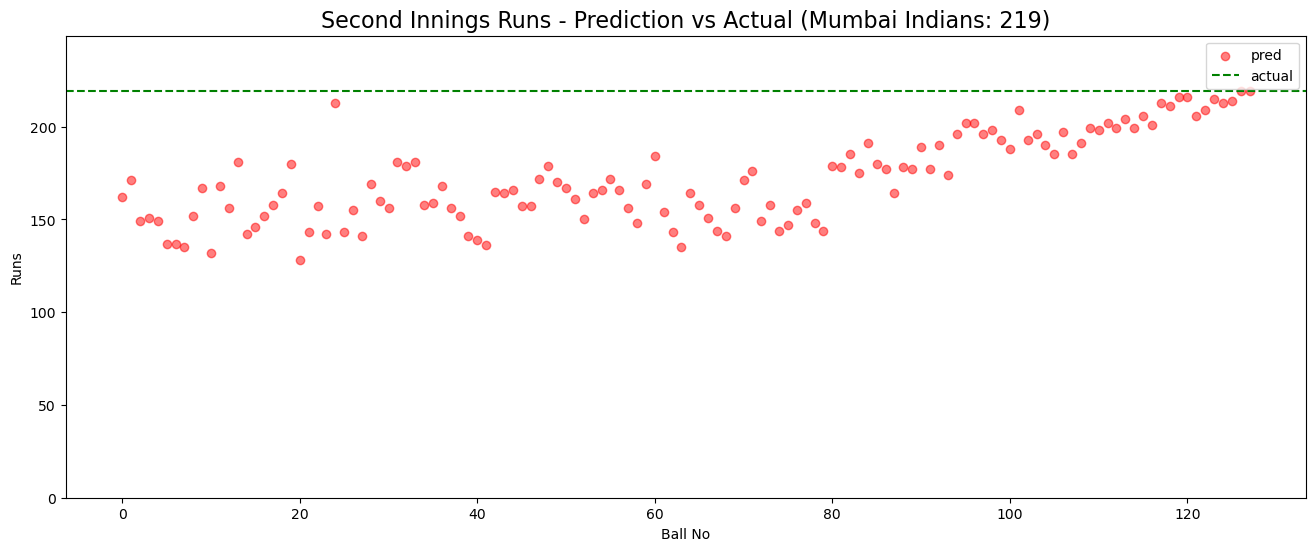

In [135]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [136]:
#ERROR IN 2nd INNINGS RUNS
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

47.359375

# WIN PREDICTION 1st INNINGS

In [137]:
# 1, 2 innings & predict win 

# for each ball make a prediction: 1st runs, 2nd runs, win/lose/tie

# initialize win/tie/lose
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        
        ing1_prediction = innings_1_runs(ing1_curr_overs, ing1_curr_score, ing1_curr_wickets)
        target = ing1_prediction
        
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
#         print(ing1_prediction, ing2_prediction)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

# WIN PREDICTION 2nd INNINGS

In [138]:
# each ball
#2nd innings values
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0

for i in range(len(df_ing2)):
    
    # 1st innings values
    target = ing1_actual_score
    
    #2nd innings values
    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs = df_ing2.ball[i]
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
#         print(target, ing2_prediction)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

# WIN PREDICTION CHART

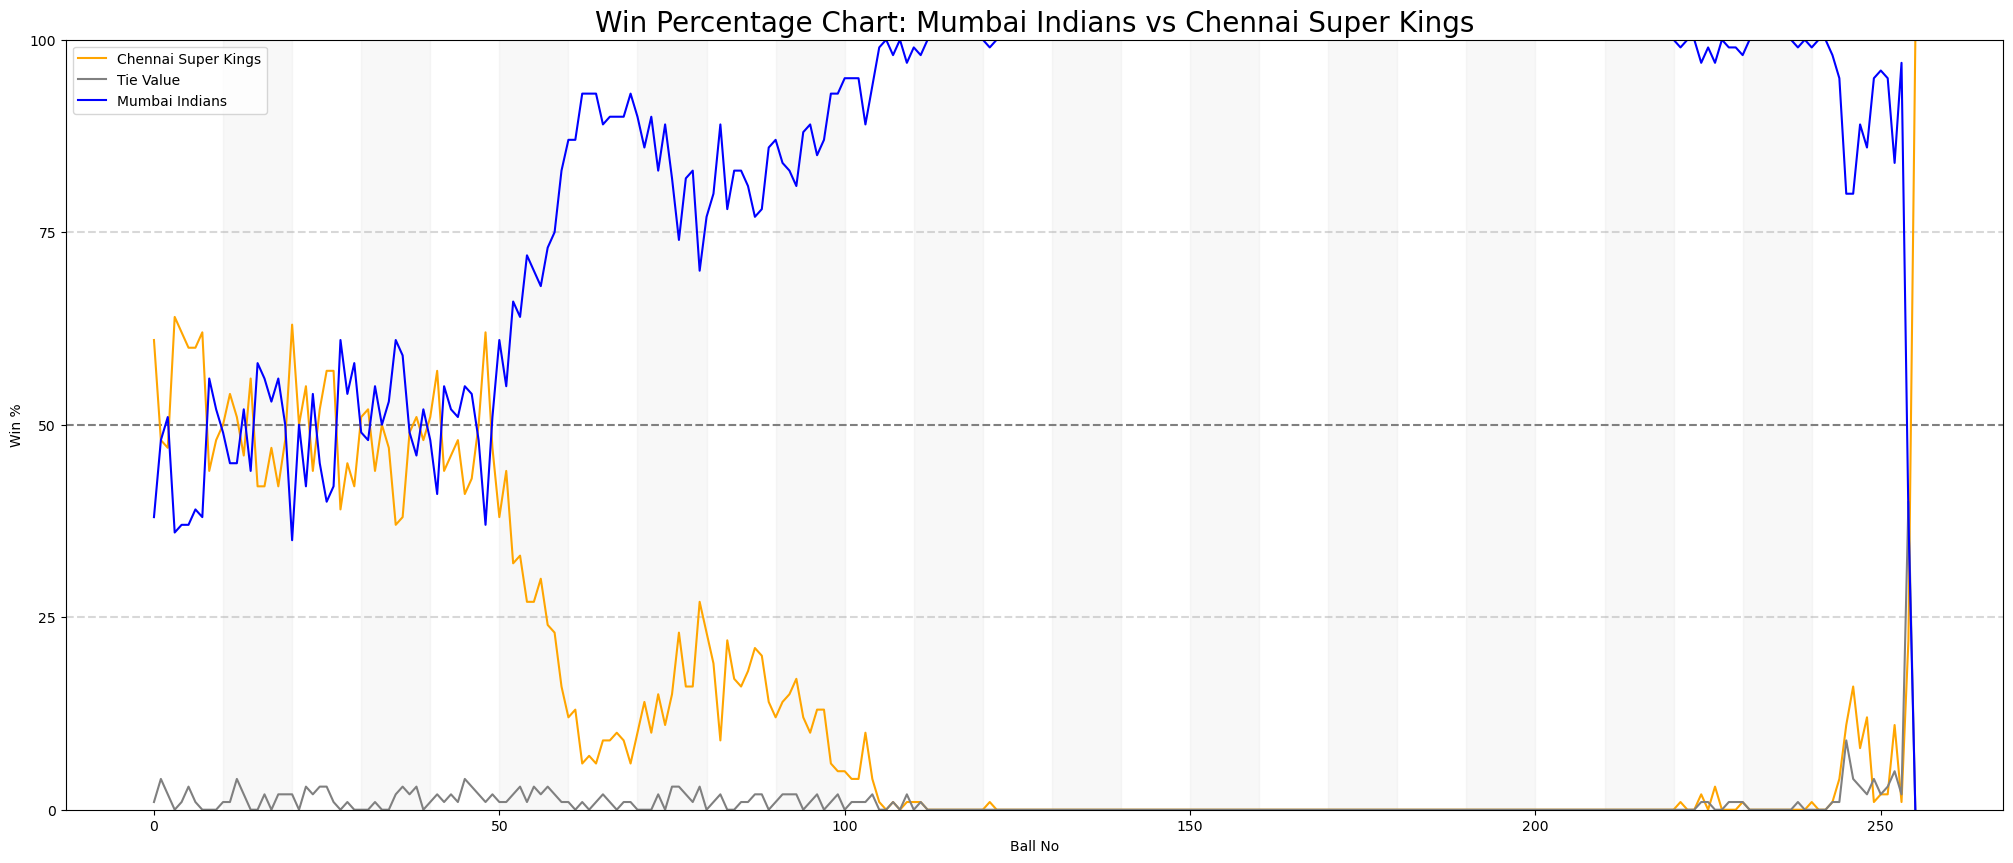

In [139]:
plt.figure(figsize = (25, 10))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])


# add confidence interval
# ci = 3
# plt.fill_between(x1_values, np.array(y1_values) - ci, np.array(y1_values) + ci, color = 'orange', alpha = 0.2 )
# plt.fill_between(x2_values, np.array(y2_values) - ci, np.array(y2_values) + ci, color = 'grey', alpha = 0.2 )
# plt.fill_between(x3_values, np.array(y3_values) - ci, np.array(y3_values) + ci, color = 'blue', alpha = 0.2 )

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 20)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()

In [140]:
Probability of T1: [0.3425843236930686, 0.3893659407845023, 0.05911245448924916, 0.003572164594353232, 0.10984406127636188, 0.04818987428728447, 0.047331180875180325]
Probability of T2: [0.33114127317912445, 0.4020263811890652, 0.06522653412349455, 0.0037468935194035556, 0.10816287516727204, 0.04813611164213343, 0.041559931179506786]

SyntaxError: invalid syntax (213206980.py, line 1)

In [141]:
def get_pbvalues(teamName):
  
    if teamName == 'CSK':
        p_0 = 0.34258
        p_1 = 0.34258 + 0.38936
        p_2 = 0.34258 + 0.38936 + 0.059112
        p_3 = 0.34258 + 0.38936 + 0.059112 + 0.00357
        p_4 = 0.34258 + 0.38936 + 0.059112 + 0.00357 + 0.10984
        p_6 = 0.34258 + 0.38936 + 0.059112 + 0.00357 + 0.10984 + 0.04818
        p_w = 1
    
    elif teamName == 'MI':
        p_0 = 0.33114
        p_1 = 0.33114 + 0.40202
        p_2 = 0.33114 + 0.40202 + 0.06522
        p_3 = 0.33114 + 0.40202 + 0.06522 + 0.00374
        p_4 = 0.33114 + 0.40202 + 0.06522 + 0.00374 + 0.10816
        p_6 = 0.33114 + 0.40202 + 0.06522 + 0.00374 + 0.10816 + 0.04813
        p_w = 1

    return p_0, p_1, p_2, p_3, p_4, p_6, p_w

# RUNS PREDICTION MODEL

In [142]:
def predict_runs(target, current_score, current_wickets, current_overs):
  
    # pb values of both teams
    i1p_0, i1p_1, i1p_2, i1p_3, i1p_4, i1p_6, i1p_w = get_pbvalues('CSK')
    i2p_0, i2p_1, i2p_2, i2p_3, i2p_4, i2p_6, i2p_w = get_pbvalues('MI')

    pred_runs = current_score
    pred_wks = current_wickets
    leftover_balls = 120 - current_overs*6

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        if pred_runs > target:
            break
        # print('pred_runs: ', pred_runs)
        # print('pred_wks: ', pred_wks)
    
    return pred_runs

In [143]:
# predict_runs(target, current_score, current_wickets, current_overs)
predict_runs(219, 81, 3, 10)

128

In [144]:
#WINNER FUNCTION

def get_win(pred_runs, target):
    if pred_runs > target:
        return 'win'
    elif pred_runs == target:
        return 'tie'
    else:
        return 'lose'


In [145]:
# runs, wickets, overs, 
# win - 1st ing score

# CSK - 218/6

target = 219

current_score = 81
current_wickets = 3
current_overs = 10

iter_count = 100

runs_ls = []
results_ls = []

win_count = 0
tie_count = 0
lose_count = 0

for i in range(iter_count):
    pred_runs = predict_runs(target, current_score, current_wickets, current_overs)
    runs_ls.append(pred_runs)
    result_pred = get_win(pred_runs, target)
    results_ls.append(result_pred)

    if result_pred == 'win':
        win_count += 1
    elif result_pred == 'tie':
        tie_count += 1
    else:
        lose_count +=1
        
win_count, tie_count, lose_count

(0, 0, 100)

# FIND OUT RUNS AT REQUIRED STAGE

In [146]:
# find out runs:
def find_runs(current_score, target, current_wickets, at_overs):
    runs_ls = []
    results_ls = []

    req_runs = []
    win_ls = []

    for i in range(current_score, target + 1):
        win_count = 0
        tie_count = 0
        lose_count = 0

        for j in range(100):
            pred_runs = predict_runs(target, i, current_wickets, at_overs)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                lose_count +=1

            win_ls.append(win_count)
            req_runs.append(i)
            # print('runs: ', i, ' win%: ', win_count)

    required_runs = current_score
    for i in range(len(req_runs)):
        if win_ls[i] >= 50:
            required_runs = req_runs[i]
            # print('Runs to be: ', req_runs[i])
            break

    return required_runs

# find_runs(current_score, target, current_wickets, at_overs)
find_runs(81, 219, 3, 10)

144

# FIND OUT WICKETS AFFORDED TO LOSE

In [147]:
def find_wickets(current_score, target, current_wickets, at_overs):

#     find_runs(current_score, target, current_wickets, at_overs)
    req_runs = find_runs(current_score, target, current_wickets, at_overs)

    runs_ls = []
    results_ls = []

    req_wks = []
    win_ls = []

    for i in range(current_wickets, 10):
        win_count = 0
        tie_count = 0
        lose_count = 0

        for j in range(100):
#             pred_runs = predict_runs(target, req_runs, i, at_overs)
            pred_runs = predict_runs(target, current_score, i, at_overs)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                lose_count +=1

        win_ls.append(win_count)
        req_wks.append(i)
#         print('wickets: ', i, ' win%: ', win_count)

    req_wicket_value = current_wickets
    
    for i in range(len(req_wks)):
        if (win_ls[i] < 45)  :
            req_wicket_value = req_wks[i]
            break

    return req_wicket_value

# wickets they can afford to lose:

# find_wickets(current_score, target, current_wickets, at_overs)
find_wickets(81, 219, 3, 10)

3

# INTERACTIVE CHART

In [163]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

def find_runs_wickets(current_wks, at_overs, target_score):
    plt.figure(figsize = (16, 6))
    # x = np.linspace(-10, 10, num=1000)
    x = np.array(list(range(21)))
    req_value = find_runs(138, target_score, current_wks, at_overs)
    req_wk_value = find_wickets(138, target_score, current_wks, at_overs)

    if at_overs == 10:
        req_value = 138
        req_wk_value = 4

    
    # print(req_value)
    y = np.array([req_value for i in range(21)])

    # plt.plot(x, current_overs * x + target_score)
    # plt.plot(x, y)
    plt.scatter(at_overs, req_value, s = 1200, color = 'red')
    plt.axhline(target_score, ls = '--', color = 'blue')
    plt.text( 1, target_score + 10, 'Target Score :' + str(target_score) , color = 'darkblue', fontsize = 13)
    plt.text( at_overs, req_value, str(req_value) + '/' + str(req_wk_value), color = 'white', fontsize = 12,  horizontalalignment='center', verticalalignment='center')
    plt.text(at_overs, req_value - 30, 'MI has to be at ' + str(req_value) + '/' +  str(req_wk_value) + ' after ' + str(at_overs) + ' ov', horizontalalignment='center')
    plt.ylim(50, target_score + 50)
    plt.xticks(x)
    plt.title('Where should MI be?', fontsize = 20)
    plt.xlabel('Overs')
    plt.ylabel('Score')
    plt.show()

x=widgets.IntSlider(min=-10, max=30, step=1, value=10)

#find_wickets(current_score, target, current_wickets, at_overs)
#find_wickets(81, 219, 3, 10)

print('current_score = MI: 81/3 (10 overs)')
print('')

interactive_plot = interactive(find_runs_wickets, current_wks = widgets.IntSlider(min=1, max=10, step=1, value=1),  at_overs=widgets.IntSlider(min=10, max=20, step=1, value=10), target_score = widgets.IntSlider(min=0, max=250, step=1, value=219))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

current_score = MI: 81/3 (10 overs)



interactive(children=(IntSlider(value=1, description='current_wks', max=10, min=1), IntSlider(value=10, descri…

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets

def predict_runs(target, current_score, current_wickets, at_overs):
    # Placeholder for actual run prediction logic
    # Here, we simulate predicted runs as a random value between current_score and target
    return np.random.randint(current_score, target + 1)

def get_win(predicted_runs, target):
    # Determine win, lose, or tie based on predicted runs
    if predicted_runs > target:
        return 'win'
    elif predicted_runs == target:
        return 'tie'
    else:
        return 'lose'

def find_runs(current_score, target, current_wickets, at_overs):
    runs_ls = []
    results_ls = []

    req_runs = []
    win_ls = []

    for i in range(current_score, target + 1):
        win_count = 0

        for _ in range(100):
            pred_runs = predict_runs(target, i, current_wickets, at_overs)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1

            req_runs.append(i)
            win_ls.append(win_count)

    required_runs = current_score
    for i in range(len(req_runs)):
        if win_ls[i] >= 50:
            required_runs = req_runs[i]
            break

    return required_runs

def find_wickets(current_score, target, current_wickets, at_overs):
    # This function should calculate the required wickets based on a similar logic
    wickets_ls = []

    for i in range(current_wickets, 11):
        win_count = 0

        for _ in range(100):
            pred_runs = predict_runs(target, current_score, i, at_overs)
            result_pred = get_win(pred_runs, target)

            if result_pred == 'win':
                win_count += 1

            if win_count >= 50:
                wickets_ls.append(i)
                break

    if wickets_ls:
        return wickets_ls[0]
    else:
        return current_wickets

def find_runs_wickets(current_score, current_wks, at_overs, target_score):
    plt.figure(figsize=(16, 8))
    
    x = np.arange(21)
    req_value = find_runs(current_score, target_score, current_wks, at_overs)
    req_wk_value = find_wickets(current_score, target_score, current_wks, at_overs)

    y = np.array([req_value for _ in range(21)])

    plt.scatter(at_overs, req_value, s=1200, color='red')
    plt.axhline(target_score, ls='--', color='blue')
    plt.text(1, target_score + 10, 'Target Score: ' + str(target_score), color='darkblue', fontsize=13)
    plt.text(at_overs, req_value, f'{req_value}/{req_wk_value}', color='white', fontsize=12, ha='center', va='center')
    plt.text(at_overs, req_value - 30, f'MI has to be at {req_value}/{req_wk_value} after {at_overs} overs', ha='center')

    # Adding information for 5, 10, and 15 overs
    for overs in [5, 10, 15]:
        req_val = find_runs(current_score, target_score, current_wks, overs)
        req_wk_val = find_wickets(current_score, target_score, current_wks, overs)
        plt.scatter(overs, req_val, s=600, color='green')
        plt.text(overs, req_val + 5, f'{req_val}/{req_wk_val}', color='black', fontsize=10, ha='center')

    plt.ylim(50, target_score + 50)
    plt.xticks(x)
    plt.title('Where should MI be?', fontsize=20)
    plt.xlabel('Overs')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()

interactive_plot = interactive(find_runs_wickets, current_score=widgets.IntSlider(min=0, max=250, step=1, value=81), current_wks=widgets.IntSlider(min=1, max=10, step=1, value=3), at_overs=widgets.IntSlider(min=10, max=20, step=1, value=20), target_score=widgets.IntSlider(min=0, max=250, step=1, value=219))

output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot


interactive(children=(IntSlider(value=81, description='current_score', max=250), IntSlider(value=3, descriptio…